In [1]:
# code taken from https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/, adapted to use LSTM instead of SimpleRNN

In [2]:
n = 9

In [3]:
def zanh(x):
    return 0.006769816 + 0.554670504 * x - 0.009411195 * x**2 - 0.014187547 * x**3

def zanh_int(x, n):
    return  6769816 * 10**(3*n) + 554670504 * x * 10**(2*n) - 9411195 * x**2 * 10**n - 14187547 * x**3

def zigmoid(x):
    return 0.502073021 + 0.198695283 * x - 0.001570683 * x**2 - 0.004001354 * x**3

def zigmoid_int(x, n):
    return 502073021 * 10**(3*n) + 198695283 * x * 10**(2*n) - 1570683 * x**2 * 10**n - 4001354 * x**3

In [4]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import json

Epoch 1/20


2023-10-13 22:23:46.072666: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


187/187 - 2s - loss: 0.0359 - 2s/epoch - 10ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0090 - 435ms/epoch - 2ms/step
Epoch 3/20
187/187 - 1s - loss: 0.0088 - 583ms/epoch - 3ms/step
Epoch 4/20
187/187 - 1s - loss: 0.0072 - 577ms/epoch - 3ms/step
Epoch 5/20
187/187 - 1s - loss: 0.0066 - 580ms/epoch - 3ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0055 - 445ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0054 - 390ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0054 - 363ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0052 - 355ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0057 - 355ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0046 - 455ms/epoch - 2ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0046 - 570ms/epoch - 3ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0046 - 451ms/epoch - 2ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0049 - 527ms/epoch - 3ms/step
Epoch 15/20
187/187 - 0s - loss: 0.0048 - 450ms/epoch - 2ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0041 - 617ms

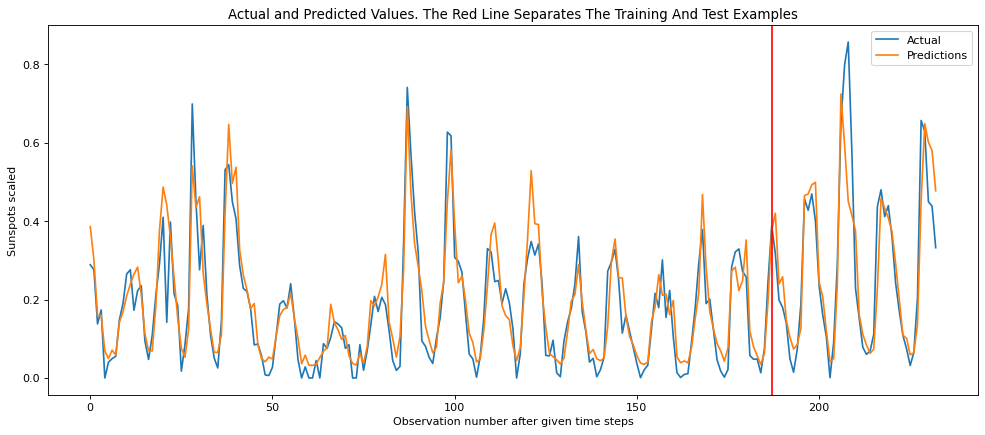

In [5]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], recurrent_activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[2]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['linear', 'linear', 'linear'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3)                 60        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [7]:
W = (model.get_weights()[0]*float(10**n)).round().astype(int)
U = (model.get_weights()[1]*float(10**n)).round().astype(int)
bh = (model.get_weights()[2]*float(10**(2*n))).round().astype(int)
wy = model.get_weights()[3]
by = model.get_weights()[4]

print('W = ', W, ' U = ', U, ' bh = ', bh, ' wy =', wy, 'by = ', by)

W =  [[ 170327312 -564612608 -390387712  214935808 -429115456   96965960
   203470352   71750616   79121408 -486187168 -677092928  697464448]]  U =  [[  23814152 -468618176 -262628352  389202976 -277258048   32764118
   199019648   40727312 -460361792 -428369984  404569152  187418096]
 [-523834720  349326368  310698432 -283792928 -157471072   46464412
   100108432  477218560 -132734176   41400848  243895936 -543470336]
 [-312775424  337398752 -244821728  512314496 -246955808  100355592
   195550464  209603712  -82764464  204333200 -284024064  417558336]]  bh =  [ -62338864731127808 -133001427621511168 -139130543521398784
  910301688273829888 1103174444605505536 1070824132456742912
  -30800099537846272 -169023060635025408 -108405550076657664
   -1257894452396032     324611078094848   34907112622522368]  wy = [[ 0.7424976 ]
 [-0.46579757]
 [ 1.1881377 ]] by =  [0.01874215]


In [8]:
wi = W[:,:3]
wf = W[:,3:6]
wc = W[:,6:9]
wo = W[:,9:]

ui = U[:,:3]
uf = U[:,3:6]
uc = U[:,6:9]
uo = U[:,9:]

bi = bh[:3]
bf = bh[3:6]
bc = bh[6:9]
bo = bh[9:]

print('wi = ', wi, ' ui = ', ui, ' wf = ', wf, ' uf = ', uf, ' wc = ', wc, ' uc = ', uc, ' wo = ', wo, ' uo = ', uo)


wi =  [[ 170327312 -564612608 -390387712]]  ui =  [[  23814152 -468618176 -262628352]
 [-523834720  349326368  310698432]
 [-312775424  337398752 -244821728]]  wf =  [[ 214935808 -429115456   96965960]]  uf =  [[ 389202976 -277258048   32764118]
 [-283792928 -157471072   46464412]
 [ 512314496 -246955808  100355592]]  wc =  [[203470352  71750616  79121408]]  uc =  [[ 199019648   40727312 -460361792]
 [ 100108432  477218560 -132734176]
 [ 195550464  209603712  -82764464]]  wo =  [[-486187168 -677092928  697464448]]  uo =  [[-428369984  404569152  187418096]
 [  41400848  243895936 -543470336]
 [ 204333200 -284024064  417558336]]


In [9]:
X = (testX[0]*float(10**n)).round().astype(int)
print('X = ', X)

X =  [[522064576]
 [506304160]
 [330575264]
 [430654048]
 [459810816]
 [513396384]
 [571710016]
 [542553152]
 [396769088]
 [492119744]
 [293144192]
 [349881792]]


In [10]:
h = [np.zeros(3).astype(int)]
c = [np.zeros(3).astype(int)]
f_out = []
f_remainder = []
i_out = []
i_remainder = []
o_out = []
o_remainder = []
candidate_out = []
candidate_remainder = []
c_out = []
c_remainder = []
h_out = []
h_remainder = []
for j in range(12):
    f = np.dot(X[j], wf) + np.dot(h[-1],uf) + bf
    of = f // 10**n
    rf = f % 10**n
    f_out.append(of.astype(str).flatten().tolist())
    f_remainder.append(rf.astype(str).flatten().tolist())

    i = np.dot(X[j], wi) + np.dot(h[-1],ui) + bi
    oi = i // 10**n
    ri = i % 10**n
    i_out.append(oi.astype(str).flatten().tolist())
    i_remainder.append(ri.astype(str).flatten().tolist())

    o = np.dot(X[j], wo) + np.dot(h[-1],uo) + bo
    oo = o // 10**n
    ro = o % 10**n
    o_out.append(oo.astype(str).flatten().tolist())
    o_remainder.append(ro.astype(str).flatten().tolist())

    candidate = np.dot(X[j], wc) + np.dot(h[-1],uc) + bc
    oca = candidate // 10**n
    rca = candidate % 10**n
    candidate_out.append(oca.astype(str).flatten().tolist())
    candidate_remainder.append(rca.astype(str).flatten().tolist())

    print("f = ", of, " i = ", oi, " o = ", oo, " candidate = ", oca)

    C = np.multiply(of, c[-1]) + np.multiply(oi, oca)
    oc = C // 10**n
    rc = C % 10**n

    H = np.multiply(oo, oc)
    oh = H // 10**n
    rh = H % 10**n

    print("C = ", C, " H = ", H)
    
    h.append(oh)
    c.append(oc)
    c_out.append(oc.astype(str).flatten().tolist())
    c_remainder.append(rc.astype(str).flatten().tolist())
    h_out.append(oh.astype(str).flatten().tolist())
    h_remainder.append(rh.astype(str).flatten().tolist())
    print('oc = ', oc, ' oh = ', oh, ' rc = ', rc, ' rh = ', rh)

with open('f_out.json', 'w') as f:
    json.dump(f_out , f)

with open('f_remainder.json', 'w') as f:
    json.dump(f_remainder , f)

with open('i_out.json', 'w') as f:
    json.dump(i_out , f)

with open('i_remainder.json', 'w') as f:
    json.dump(i_remainder , f)

with open('o_out.json', 'w') as f:
    json.dump(o_out , f)

with open('o_remainder.json', 'w') as f:
    json.dump(o_remainder , f)

with open('candidate_out.json', 'w') as f:
    json.dump(candidate_out , f)

with open('candidate_remainder.json', 'w') as f:
    json.dump(candidate_remainder , f)

with open('c_out.json', 'w') as f:
    json.dump(c_out , f)

with open('c_remainder.json', 'w') as f:
    json.dump(c_remainder , f)

with open('h_out.json', 'w') as f:
    json.dump(h_out , f)

with open('h_remainder.json', 'w') as f:
    json.dump(h_remainder , f)

f =  [1022512059  879148466 1121446625]  i =  [  26582991 -427765670 -342938139]  o =  [-255078993 -353161622  399028593]  candidate =  [  75424563 -131564606  -67099066]
C =  [ 2005010479407933 56278821833876020 23010828822678174]  H =  [  -511435931754930 -19875519708607662   9181978320605004]
oc =  [ 2005010 56278821 23010828]  oh =  [  -511436 -19875520   9181978]  rc =  [479407933 833876020 822678174]  rh =  [ 68245070 291392338 320605004]
f =  [1029270122  886915580 1119899603]  i =  [  31425972 -422472527 -345074390]  o =  [-246144077 -350152728  402576178]  candidate =  [  71921833 -140276646  -66232388]
C =  [  4323910397357896 109177592283635622  48624918029244604]  H =  [ -1064304835981070 -38228831675270976  19575233644003404]
oc =  [  4323910 109177592  48624918]  oh =  [ -1064305 -38228832  19575233]  rc =  [397357896 283635622  29244604]  rh =  [164018930 324729024 644003404]
f =  [1001817666  962800294 1103032013]  i =  [   7844723 -325899317 -284573629]  o =  [-1591062

In [11]:
y = model.predict(testX[[0]])
o12 = np.dot(h[-1]/float(10**n), wy) + by
print(y, o12)

1/1 [==============================] - 0s 35ms/step
[[0.37735683]] [0.37735677]


In [12]:
# quantization
params_json = {
    'wi': wi.round().astype(int).astype(str).flatten().tolist(),
    'wf': wf.round().astype(int).astype(str).flatten().tolist(),
    'wc': wc.round().astype(int).astype(str).flatten().tolist(),
    'wo': wo.round().astype(int).astype(str).flatten().tolist(),
    'ui': ui.round().astype(int).astype(str).flatten().tolist(),
    'uf': uf.round().astype(int).astype(str).flatten().tolist(),
    'uc': uc.round().astype(int).astype(str).flatten().tolist(),
    'uo': uo.round().astype(int).astype(str).flatten().tolist(),
    'bi': bi.round().astype(int).astype(str).flatten().tolist(),
    'bf': bf.round().astype(int).astype(str).flatten().tolist(),
    'bc': bc.round().astype(int).astype(str).flatten().tolist(),
    'bo': bo.round().astype(int).astype(str).flatten().tolist(),
}

In [13]:
with open('params.json', 'w') as f:
    json.dump(params_json, f)

In [14]:
with open("in.json", "w") as f:
    json.dump(X.round().astype(int).astype(str).flatten().tolist(), f)

In [15]:
# convert oh and oc to hex
for i in range(3):
    print(hex(oh[i]))

for i in range(3):
    print(hex(oc[i]))

-0x7107c9
-0x90a190c
0xeb8f6e3
0x34e385e
0x1b80e4ce
0x21d44bcd
